In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
train.shape

(42000, 785)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's check how many examples do we have for each of the digit.

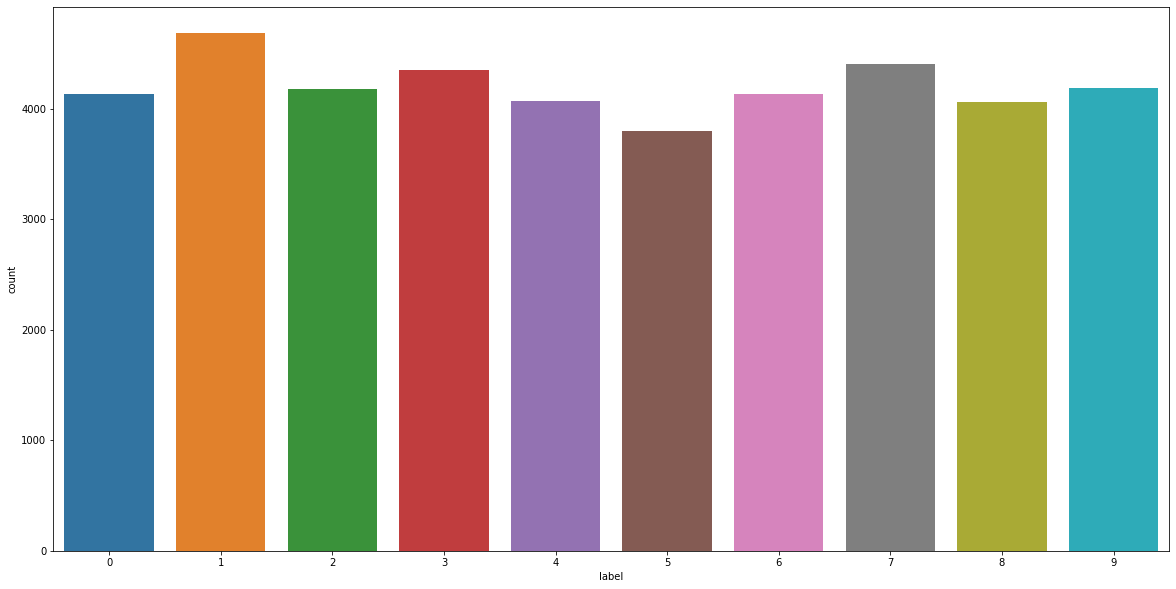

In [4]:
plt.figure(figsize=(20,10))
sb.countplot(train['label'])
plt.show()

### Visualizing some of the examples from the given dataset.

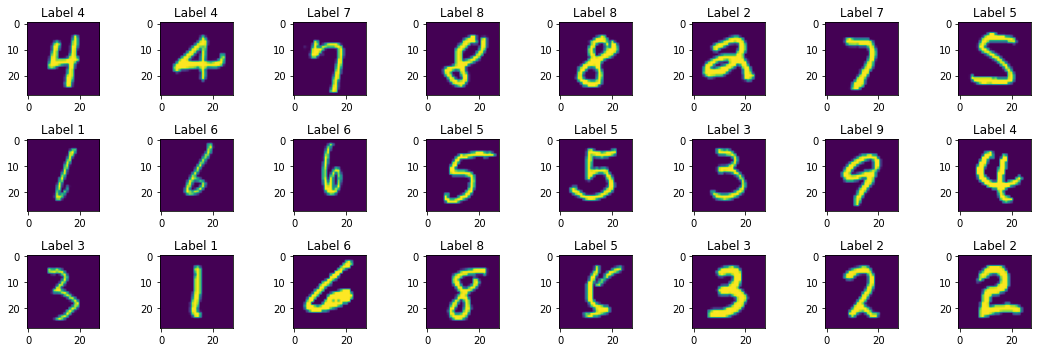

In [5]:
plt.subplots(figsize=(15,5))

for i in range(24):
  plt.subplot(3,8,i+1)
  k = np.random.randint(10000)
  plt.imshow(train.loc[k][1:].values.reshape(28,28))
  plt.title('Label ' + str(train.loc[k][0:1][0]))
plt.tight_layout()
plt.show()

## Baseline
Let's check what is the base line solution for the test data.

In [6]:
ss = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
ss['Label'] = 4
ss.to_csv('Submission.csv',index=False)
ss.head()

,ImageId,Label
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4


* Hence, as expected we get the 10% accuracy on the categorization of the digits based on the pixel value.

* So, 10% is our baseline accuracy.

## Logistic Regression And SVM

* First let's try to predict the digits using a logistic regression and an svm model.

## Neural Network
* Secondly we will try to build Neural Network classifier to learn complex non-linear function which can fit our function even better without overfitting in keras.

In [7]:
features = train.drop(['label'],axis=1)
target = train['label']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.05, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [8]:
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
print('Logistic Regression:')
Y_pred = model_log.predict(X_train)
print('Training Accuracy : ',metrics.accuracy_score(Y_train, Y_pred))

Y_pred = model_log.predict(X_val)
print('Validation Accuracy : ',metrics.accuracy_score(Y_val, Y_pred))

Logistic Regression:
Training Accuracy :  0.9511779448621553
Validation Accuracy :  0.9176190476190477


In [9]:
model_svm = svm.SVC(kernel="linear")

model_svm.fit(X_train, Y_train)
print('Support Vector Machine:')
Y_pred = model_svm.predict(X_train)
print('Training Accuracy : ',metrics.accuracy_score(Y_train, Y_pred))

Y_pred = model_svm.predict(X_val)
print('Validation Accuracy : ',metrics.accuracy_score(Y_val, Y_pred))
print()

Support Vector Machine:
Training Accuracy :  0.9891979949874686
Validation Accuracy :  0.9233333333333333



* #### We are able to get an acuuracy rate of 91% using Logistic regression model.
* #### SVM gives an accuracy rate of 92% which is an improvement from Logistic regression but SVM is overfitting on the training data we can observe from the training and the validation accuracy difference.

### Neural Network: For digit classification.

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model_nn = keras.Sequential([
      layers.Dense(256, activation='relu',input_shape=[784]),
      layers.BatchNormalization(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.3),
      layers.BatchNormalization(),
      layers.Dense(10, activation='softmax')
])

model_nn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']
)

2022-04-06 15:09:03.338060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 15:09:03.467718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 15:09:03.468872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 15:09:03.470491: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 271,370
Trainable params: 270,346
Non-trainable params: 1,024
______________________________________________

In [12]:
history = model_nn.fit(X_train, Y_train,
                    epochs = 5,
                    validation_data = (X_val, Y_val))

2022-04-06 15:09:06.882925: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1247/1247 [==============================] - 8s 5ms/step - loss: 0.3079 - sparse_categorical_accuracy: 0.9064 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 0.9595
Epoch 2/5
1247/1247 [==============================] - 5s 4ms/step - loss: 0.1530 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/5
1247/1247 [==============================] - 6s 5ms/step - loss: 0.1111 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1258 - val_sparse_categorical_accuracy: 0.9629
Epoch 4/5
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.1045 - val_sparse_categorical_accuracy: 0.9662
Epoch 5/5
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0963 - val_sparse_categorical_accuracy: 0.9719


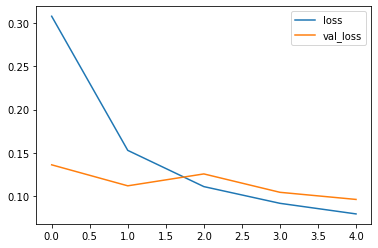

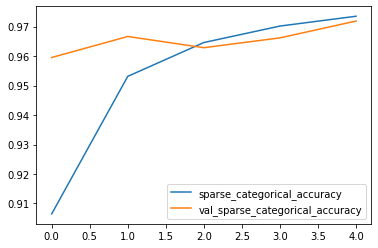

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()
plt.show()

### So, here we can observe that the neural network classify the digits with an accuracy rate of 98% and it isn't overfitting the training data which is visible from the learning curves.

In [14]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test = scaler.transform(test)

In [15]:
ss['Label'] = np.argmax(model_nn.predict(test), axis=1)
ss.to_csv('Submission_NN.csv',index=False)
ss.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Why not to try Convolutional Neural network as well?

In [16]:
X_train = X_train.reshape((39900,28,28,1))
X_val = X_val.reshape((2100,28,28,1))

In [17]:
model_cnn = tf.keras.models.Sequential([
                                    layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'),
                                    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                                    

                                    layers.Flatten(),
                                    layers.Dense(512,activation='relu'),
                                    layers.BatchNormalization(),
                                    layers.Dense(256,activation='relu'),
                                    layers.Dropout(0.3),
                                    layers.BatchNormalization(),
                                    layers.Dense(10,activation='softmax')
])

In [18]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [19]:
model_cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']
)

In [20]:
hist = model_cnn.fit(X_train, Y_train,
                 epochs=5,
                 validation_data=(X_val.reshape(2100,28,28,1),Y_val)
                 )

Epoch 1/5


2022-04-06 15:10:02.199741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1247/1247 [==============================] - 16s 8ms/step - loss: 0.1404 - sparse_categorical_accuracy: 0.9565 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9810
Epoch 2/5
1247/1247 [==============================] - 9s 7ms/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.0420 - val_sparse_categorical_accuracy: 0.9867
Epoch 3/5
1247/1247 [==============================] - 10s 8ms/step - loss: 0.0453 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0469 - val_sparse_categorical_accuracy: 0.9876
Epoch 4/5
1247/1247 [==============================] - 9s 8ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0488 - val_sparse_categorical_accuracy: 0.9890
Epoch 5/5
1247/1247 [==============================] - 9s 8ms/step - loss: 0.0266 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0606 - val_sparse_categorical_accuracy: 0.9857


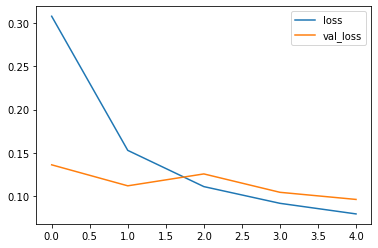

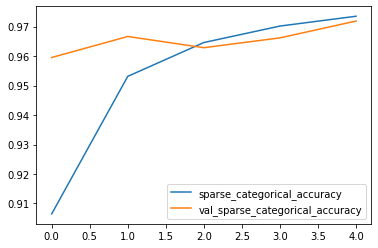

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()
plt.show()

#### So, this is the power of CNN accuracy has been shot up to 99% without overfitting the data.

In [22]:
ss['Label'] = np.argmax(model_cnn.predict(test.reshape((28000,28,28,1))), axis=1)
ss.to_csv('Submission_CNN.csv',index=False)
ss.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Visualizing convolutions

In [23]:
layer_outputs = [layer.output for layer in model_cnn.layers]
activation_model = keras.models.Model(inputs = model_cnn.input, outputs=layer_outputs)

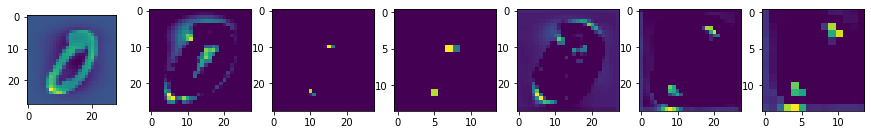

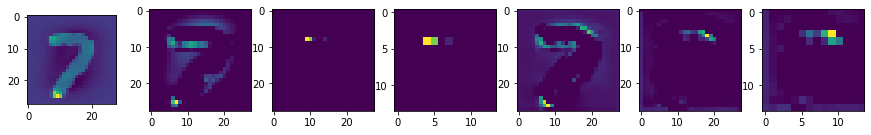

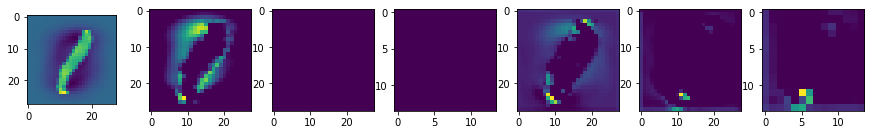

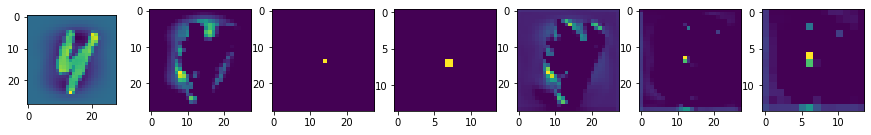

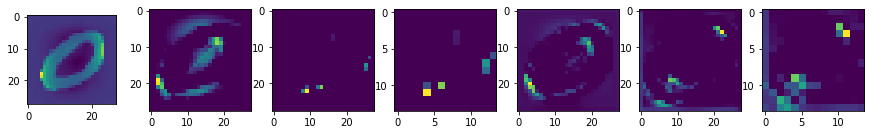

In [24]:
digits_index = [np.random.randint(10000) for i in range(5)]

for i in digits_index:
  plt.subplots(figsize=(15,15))
  plt.subplot(1,8,1)
  plt.imshow(X_train[i].reshape((28,28)))
  f1 = activation_model.predict(X_train[i].reshape(1,28,28,1))

  for j in range(2):
    plt.subplot(1,7,j*3 + 2)
    plt.imshow(f1[1][0, :, :, j*4+5])
    plt.subplot(1,7,j*3 + 3)
    plt.imshow(f1[2][0, :, :, j*4+5])
    plt.subplot(1,7,j*3 + 4)
    plt.imshow(f1[3][0, :, :, j*4+5])
  plt.tight_layout()
  plt.show()

### Observe that how the convolutions have emphasized arcs, lines which are working as a feature to learn a better model for our task to digit classification.